In [10]:
import wrf_management.plot.plot as wp
import os
import pandas as pd
from importlib import reload 
reload(wp)
import wrf
from datetime import datetime as dt

In [2]:
path = '/tmp/wrf_management/data_folder/runs/run_2019_02_20/2017_12_02/wrf/'
df = wp.get_df_list(path=path,pref='wrfout_d')

In [3]:
d = 3
pos = 0
_b = df.index.get_level_values('d')==d
row = df[_b].iloc[0]
ar = xr.open_dataset(row.p)

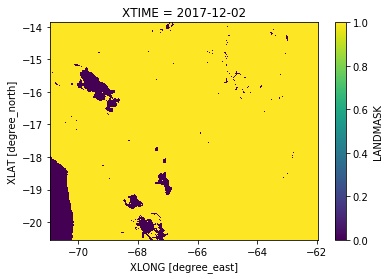

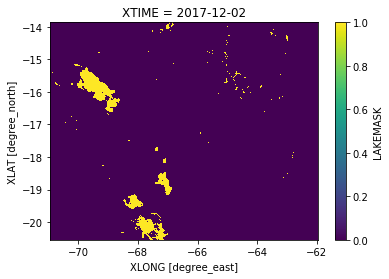

In [4]:
l2p = ['LANDMASK','LAKEMASK']
for l in l2p: 
    fig,ax=plt.subplots()
    ar1=ar[l]
    ar1=ar1.sel(Time=0)
    ar1.plot(x='XLONG',y='XLAT')

In [5]:
lam,laM,lom,loM=-17,-15,-70,-68
arr = ar[['SST','LAKEMASK']]
b1 = arr.where(
   ( arr.XLONG>lom) &
   ( arr.XLONG<loM) &
   ( arr.XLAT>lam ) &
   ( arr.XLAT<laM ) & 
    (arr.LAKEMASK==1)
)

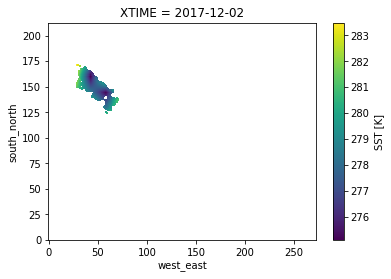

In [6]:
b1.SST[0].plot()

(array([112., 284., 624., 644., 456., 288., 180., 124.,  20.,   8.]),
 array([275.09158, 275.93033, 276.76907, 277.60782, 278.44656, 279.28528,
        280.12402, 280.96277, 281.8015 , 282.64026, 283.479  ],
       dtype=float32),
 <a list of 10 Patch objects>)

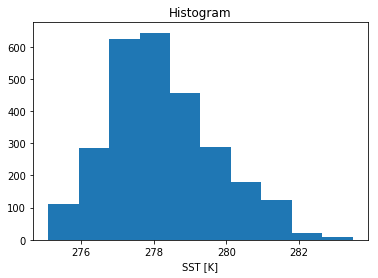

In [7]:
b1.SST.plot()

In [8]:
_b = df.index.get_level_values('d')==d
ddd = df[_b]

/Volumes/mbProD/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


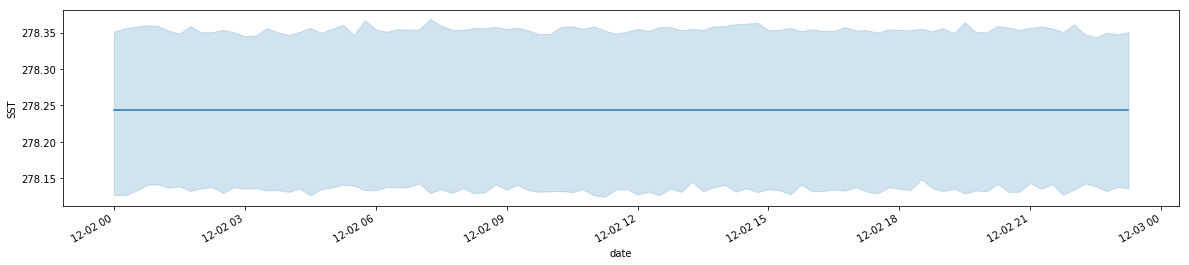

In [11]:
ndf = []
for l,r in ddd.iterrows():
    ar = xr.open_dataset(r.p)
    lam,laM,lom,loM=-17,-15,-70,-68
    arr = ar[['SST','LAKEMASK']]
    b1 = arr.where(
        ( arr.XLONG>lom) &
        ( arr.XLONG<loM) &
        ( arr.XLAT>lam ) &
        ( arr.XLAT<laM ) & 
        (arr.LAKEMASK==1)
    )
    df1 = b1.SST.to_dataframe()
    df1 = df1.dropna()
    df1 = df1.reset_index(drop=True)
    df1['date']=df1.XTIME.astype(dt)
    ndf.append(df1)
    

nndf = pd.concat(ndf, ignore_index=True)
nndf 

import seaborn as sns
fig, ax = plt.subplots()
ax = sns.lineplot(y='SST',x ='date',data=nndf , ax=ax)
fig.autofmt_xdate()
fig.set_figwidth(20)

In [ ]:
list(ar.variables)

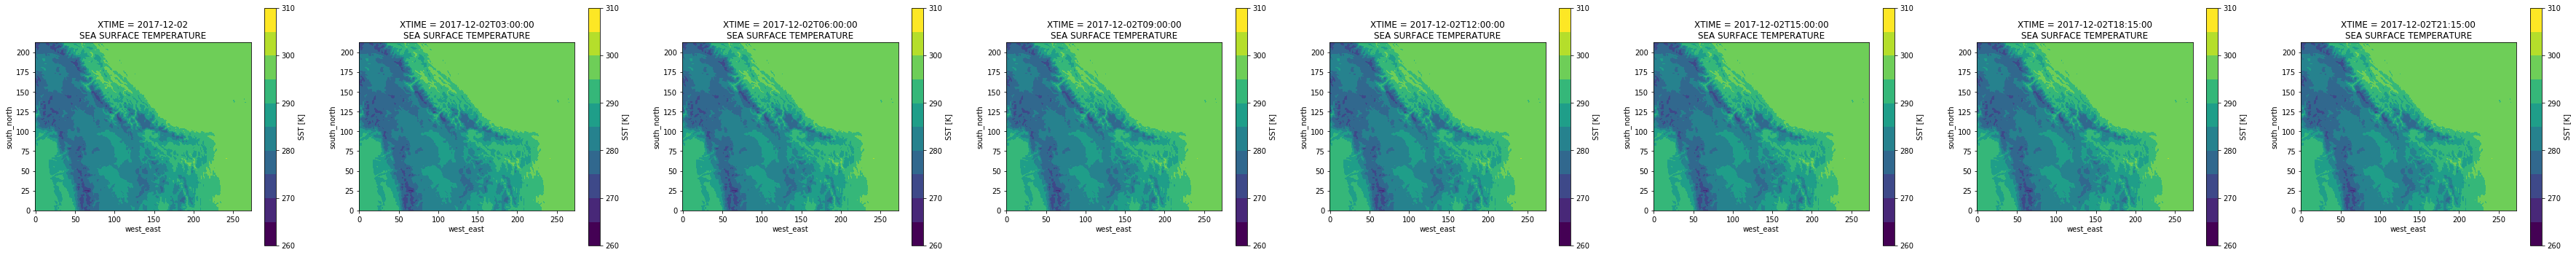

In [12]:
_d4 = df.index.get_level_values('d')==3
df4 = df[_d4]
plist =['SST']
skim = ['T','TSLB']
adjust=['T']
vm,vM = 260,310
lv = round((vM-vm)/5.)+1
columns = [0,3,6,9,12,15,18,21]
nn = 6
fig = plt.figure(d,figsize=(1.3*nn*len(columns),nn*len(plist)))
ll = 1 
for l in plist:
    for c in columns:
        row = df4.iloc[c]
        ar = xr.open_dataset(row.p)
        ax = fig.add_subplot(len(plist),len(columns),ll)
        ar1 = ar[l]
        desc = ar1.description
        ar1 = ar1.isel(Time=0)
        if l in skim: ar1 = ar1[0]
        if l in adjust: ar1 = ar1+290
        ar1.plot(ax=ax,levels=lv, vmin =vm,vmax=vM)
        ax.set_title(ax.get_title()+
                     '\n'+
                     desc)
        ax.set_aspect('equal')
        ll = ll+1

/Volumes/mbProD/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


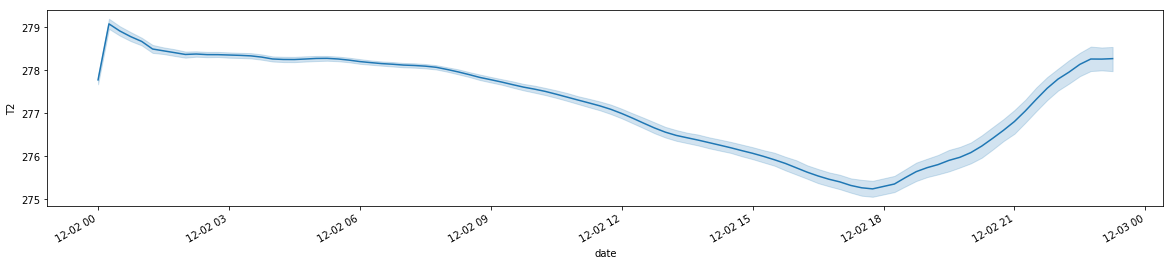

In [13]:
par = 'T2'
ndf = []
for l,r in ddd.iterrows():
    ar = xr.open_dataset(r.p)
    lam,laM,lom,loM=-17,-15,-70,-68
    arr = ar[[par,'LAKEMASK']]
    b1 = arr.where(
        ( arr.XLONG>lom) &
        ( arr.XLONG<loM) &
        ( arr.XLAT>lam ) &
        ( arr.XLAT<laM ) & 
        (arr.LAKEMASK==1)
    )
    df1 = b1[par].to_dataframe()
    df1 = df1.dropna()
    df1 = df1.reset_index(drop=True)
    df1['date']=df1.XTIME.astype(dt)
    ndf.append(df1)
    

nndf = pd.concat(ndf, ignore_index=True)
nndf 

import seaborn as sns
fig, ax = plt.subplots()
ax = sns.lineplot(y=par,x ='date',data=nndf , ax=ax)
fig.autofmt_xdate()
fig.set_figwidth(20)

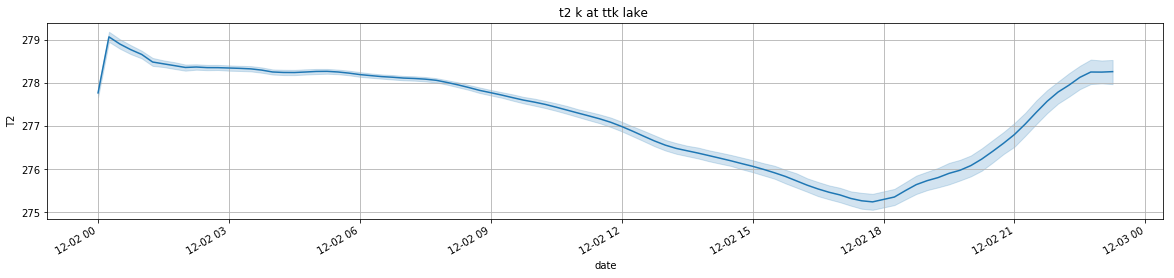

In [14]:
ax.set_title('t2 k at ttk lake ')   
ax.grid()
fig

In [ ]:
par = 'SKT'
ndf = []
for l,r in ddd.iterrows():
    ar = xr.open_dataset(r.p)
    lam,laM,lom,loM=-17,-15,-70,-68
    arr = ar[[par,'LAKEMASK']]
    b1 = arr.where(
        ( arr.XLONG>lom) &
        ( arr.XLONG<loM) &
        ( arr.XLAT>lam ) &
        ( arr.XLAT<laM ) & 
        (arr.LAKEMASK==1)
    )
    df1 = b1[par].to_dataframe()
    df1 = df1.dropna()
    df1 = df1.reset_index(drop=True)
    df1['date']=df1.XTIME.astype(dt)
    ndf.append(df1)
    

nndf = pd.concat(ndf, ignore_index=True)
nndf 

import seaborn as sns
fig, ax = plt.subplots()
ax = sns.lineplot(y=par,x ='date',data=nndf , ax=ax)
fig.autofmt_xdate()
fig.set_figwidth(20)
ax.set_title('t2 k at ttk lake ')   
ax.grid()